In [55]:
from time import time

# External
import torch
import numpy as np
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

from rich.progress import track
# Internal
torch.manual_seed(42)
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [2]:
print(torch.__version__)

2.6.0+cu124


In [3]:
x = torch.Tensor(2,3,4)
x


tensor([[[0.0000e+00, 0.0000e+00, 4.0638e-44, 3.3631e-44],
         [1.5988e+02, 0.0000e+00, 1.5723e-42, 7.1430e+31],
         [0.0000e+00, 0.0000e+00, 4.0638e-44, 1.3563e-19]],

        [[1.5988e+02, 0.0000e+00, 1.5737e-42, 3.3631e-44],
         [0.0000e+00, 0.0000e+00, 4.0638e-44, 4.7429e+30],
         [1.5988e+02, 0.0000e+00, 1.5751e-42, 2.1701e-18]]])

In [4]:
x = torch.Tensor([[1,2],[3,4]])
x


tensor([[1., 2.],
        [3., 4.]])

In [5]:
x = torch.rand(2,3,4)
x


tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [6]:
shape = x.shape
print("Shape: ",shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape:  torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [7]:
np_arr = np.array( [[1,2],[3,4]])
tensor = torch.from_numpy(np_arr)
tensor


tensor([[1, 2],
        [3, 4]])

In [8]:
tensor = torch.arange(10)
np_arr = tensor.numpy()
np_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
y = x1+x2
x1,x2,y


(
    tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]]),
    tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]]),
    tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])
)

In [10]:
x2.add_(x1)
x2


tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])

In [11]:
x = torch.arange(6)
x = x.view(2,3)
x


tensor([[0, 1, 2],
        [3, 4, 5]])

In [12]:
x = x.permute(1,0)
x


tensor([[0, 3],
        [1, 4],
        [2, 5]])

In [13]:
x = torch.arange(6)
x = x.view(2,3)
W = torch.arange(9).view(3,3)
h = torch.matmul(x,W)
h


tensor([[15, 18, 21],
        [42, 54, 66]])

In [14]:
x = torch.arange(12).view(3,4)
x[:,1]

tensor([1, 5, 9])

In [15]:
x[:2,-1]

tensor([3, 7])

In [16]:
x[1:3,1]

tensor([5, 9])

In [17]:
x = torch.ones((3))
x,x.requires_grad

(tensor([1., 1., 1.]), False)

In [18]:
x.requires_grad_(True)
x

tensor([1., 1., 1.], requires_grad=True)

In [19]:
a = torch.arange(3,dtype=torch.float32,requires_grad=True)
b = (a+2)**2
c = b+3
y = c.mean()
y

tensor(12.6667, grad_fn=<MeanBackward0>)

In [20]:
y.backward()

In [21]:
a.grad

tensor([1.3333, 2.0000, 2.6667])

In [22]:
gpu_avail = torch.cuda.is_available()
gpu_avail

True

In [23]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [24]:
x = torch.zeros(2,3)
x = x.to(device)
x


tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

In [25]:
x = torch.rand(5000,5000)
start = time()
y = torch.matmul(x,x)
end = time()
print(f"CPU time taken = {end-start:.2f}s")

x = x.to(device)
start,end = torch.cuda.Event(enable_timing=True),torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x,x)
end.record()
torch.cuda.synchronize()
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")

CPU time taken = 3.97s
GPU time: 0.21295s


In [26]:
if torch.cuda.is_available():
  torch.cuda.manual_seed(42)
  torch.cuda.manual_seed_all(42)

  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

### XOR example

We are making up a continours XOR function


In [27]:
class XOR(nn.Module):
  def __init__(self,num_inputs,num_hidden,num_outputs, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.l1 = nn.Linear(num_inputs,num_hidden)
    self.act1 = nn.Tanh()
    self.l2 = nn.Linear(num_hidden,num_outputs)

  def forward(self,x):
    x = self.l2(self.act1(self.l1(x)))
    return x

In [28]:
model = XOR(num_inputs=2,num_hidden=4,num_outputs=1)
model


XOR(
  (l1): Linear(in_features=2, out_features=4, bias=True)
  (act1): Tanh()
  (l2): Linear(in_features=4, out_features=1, bias=True)
)

In [29]:
for name,param in model.named_parameters():
  print(f"Parameter: {name}, Shape: {param.shape}")

Parameter: l1.weight, Shape: torch.Size([4, 2])
Parameter: l1.bias, Shape: torch.Size([4])
Parameter: l2.weight, Shape: torch.Size([1, 4])
Parameter: l2.bias, Shape: torch.Size([1])


In [30]:
class XORDataset(data.Dataset):

  def __init__(self,size,std=0.1) -> None:
    super().__init__()

    self.size = size
    self.std = std
    self._generate_continous_xor()

  def _generate_continous_xor(self):
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1)==1).to(torch.long)

    data += self.std*torch.randn(data.shape)

    self.data = data
    self.label = label

  def __len__(self):
    return self.size

  def __getitem__(self, index):
    data_point = self.data[index]
    label = self.label[index]

    return data_point, label

In [31]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.1551,  0.9780]), tensor(1))


In [32]:
def visualize_sample(data, label):
  data = data.cpu().numpy()
  label = label.cpu().numpy()

  data_0 = data[label==0]
  data_1 = data[label==1]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data_0[:,0],y=data_0[:,1],mode="markers",marker=dict(color="blue"),name="Class 0"))
  fig.add_trace(go.Scatter(x=data_1[:,0],y=data_1[:,1],mode="markers",marker=dict(color="orange"),name="Class 1"))

  return fig

In [33]:
visualize_sample(data=dataset.data,label=dataset.label).show()

In [34]:
dataloader = data.DataLoader(dataset, batch_size=8, shuffle=True)
data_inputs, data_labels = next(iter(dataloader))
data_inputs,data_labels


(
    tensor([[ 0.0652,  1.0126],
        [-0.0993,  1.0482],
        [ 1.0389,  0.1050],
        [ 0.9692,  0.0072],
        [ 0.9528,  0.1234],
        [ 0.9717,  0.9721],
        [ 1.0728,  1.0110],
        [ 1.1344,  0.1440]]),
    tensor([1, 1, 1, 1, 1, 0, 0, 1])
)

In [35]:
loss = nn.BCEWithLogitsLoss()

In [36]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [37]:
train_dataset = XORDataset(size=2500)
train_dataloader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [38]:
model.to(device)


XOR(
  (l1): Linear(in_features=2, out_features=4, bias=True)
  (act1): Tanh()
  (l2): Linear(in_features=4, out_features=1, bias=True)
)

In [39]:
def train_model(model, optimizer, data_loader, loss_fn, num_epochs=100):
  model.train()

  for epoch in track(range(num_epochs), description="Training...",total=num_epochs):
    for x,label in data_loader:
      x,label = x.to(device),label.to(device)

      preds = model(x).squeeze(dim=1)

      loss = loss_fn(preds,label.float())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [40]:
train_model(model, optimizer, train_dataloader, loss)

Output()

In [41]:
state_dict = model.state_dict()
state_dict


OrderedDict([('l1.weight', tensor([[ 3.3192, -3.2340],
        [-1.1819, -1.1132],
        [-0.5533, -0.7948],
        [-2.6552,  2.8586]], device='cuda:0')), ('l1.bias', tensor([ 1.5854, -0.1954,  1.4417,  1.2907], device='cuda:0')), ('l2.weight', tensor([[-4.4327, -2.0427,  1.4237, -4.3400]], device='cuda:0')), ('l2.bias', tensor([1.7298], device='cuda:0'))])

In [42]:
torch.save(state_dict, "our_model.tar")

In [43]:
state_dict = torch.load("our_model.tar")

new_model = XOR(num_inputs=2,num_hidden=4,num_outputs=1)
new_model.load_state_dict(state_dict)

<All keys matched successfully>

In [44]:
test_dataset = XORDataset(size=500)
test_dataloader = data.DataLoader(test_dataset, batch_size=128, shuffle=True,drop_last=False)

In [51]:
def eval_model(model,dataloader):
  model.eval()
  true_preds,num_preds = 0,0
  with torch.no_grad():
    for x,label in dataloader:
      x,label = x.to(device),label.to(device)
      preds = model(x).squeeze(dim=1)
      preds = torch.sigmoid(preds)
      pred_labels = (preds>=0.5).long()

      true_preds+=(pred_labels==label).sum()
      num_preds += label.shape[0]
  acc = true_preds/num_preds
  print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [52]:
eval_model(model, test_dataloader)

Accuracy of the model: 100.00%


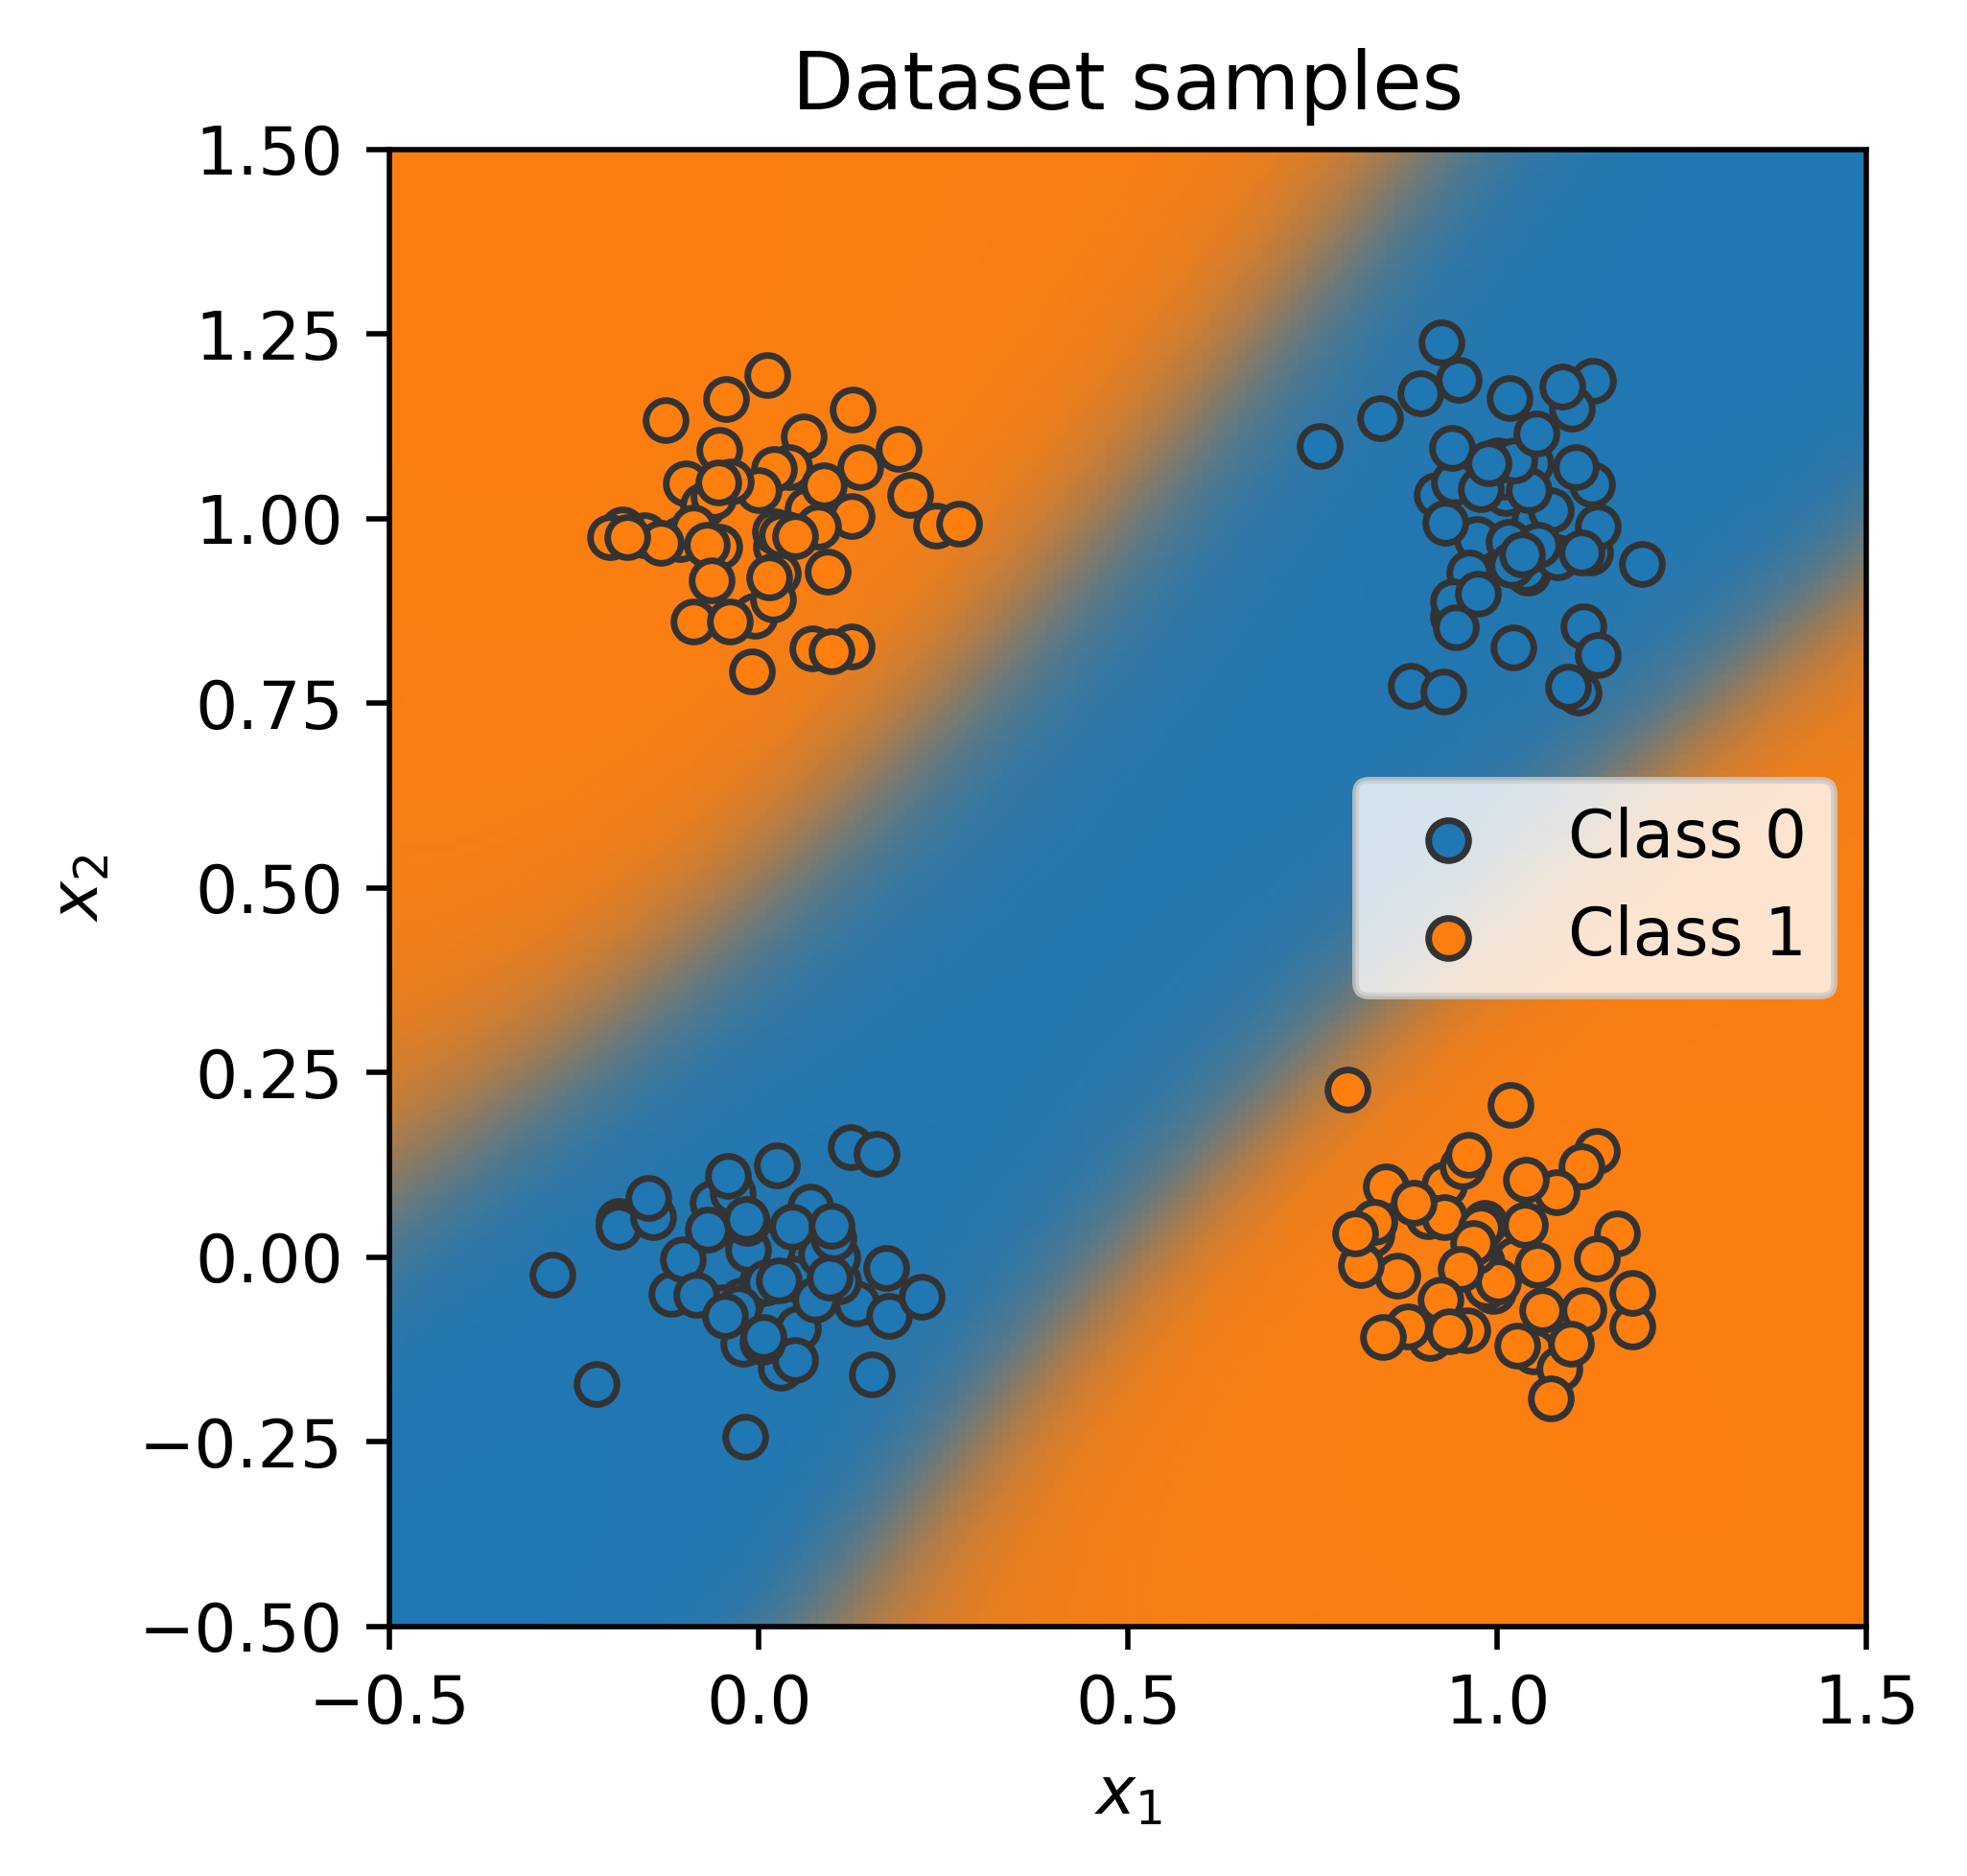

In [56]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()